In [92]:
import pandas as pd
import seaborn as sb
import matplotlib as plt
import numpy as np

In [93]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
scipy: 1.5.0
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.0.5
sklearn: 0.23.1


In [94]:
# Load libraries

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [95]:
data=pd.read_csv(r'C:\Users\NEERAJ\Documents\vs code\realestateproject\Bengaluru_House_Data.csv')
data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# EDA

In [96]:
print(data.shape)
print(data.describe())

(13320, 9)
               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


# data cleaning

In [97]:
data=data.drop(['area_type','availability','society'],axis='columns')
data.head(5)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [98]:
print(data.isnull().sum())
print(data.shape)

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64
(13320, 6)


In [99]:
data=data.dropna()
print(data.isnull().sum())
print(data.shape)

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64
(12710, 6)


# feature engineering

In [100]:
data['bhk']=data['size'].apply(lambda x:int(x.split(' ')[0]))
data.drop(['size'],axis=1,inplace=True)
data.head(5)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [101]:
''' totalsqft contains integer,range as well
'''
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [102]:
data2=data.copy()
data2.total_sqft = data2.total_sqft.apply(convert_sqft_to_num)
data2[data2['total_sqft']!=None]

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [103]:

data2=data2.dropna()
data2.isnull().sum()


location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [104]:
data2['price_per_sqft'] = data2['price']*100000/data2['total_sqft']
data2.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [105]:
print(data2.describe())
print(data2.shape)

         total_sqft          bath       balcony         price           bhk  \
count  12668.000000  12668.000000  12668.000000  12668.000000  12668.000000   
mean    1511.835167      2.616277      1.585649    105.952648      2.736422   
std     1162.097276      1.223882      0.816758    131.813137      1.202643   
min        5.000000      1.000000      0.000000      8.000000      1.000000   
25%     1100.000000      2.000000      1.000000     49.015000      2.000000   
50%     1260.000000      2.000000      2.000000     70.000000      3.000000   
75%     1640.000000      3.000000      2.000000    115.000000      3.000000   
max    52272.000000     40.000000      3.000000   2912.000000     43.000000   

       price_per_sqft  
count    1.266800e+04  
mean     6.876277e+03  
std      2.263354e+04  
min      2.678298e+02  
25%      4.242721e+03  
50%      5.376344e+03  
75%      7.142857e+03  
max      2.300000e+06  
(12668, 7)


In [106]:
data3=data2.copy()
data3.location = data3.location.apply(lambda x: x.strip())
location_stats = data3['location'].value_counts(ascending=False)
print(location_stats.shape)
print(location_stats.values.sum())
print(len(location_stats.unique()))
location_stats

(1248,)
12668
90


Whitefield         514
Sarjapur  Road     372
Electronic City    302
Kanakpura Road     259
Thanisandra        233
                  ... 
Somanna Garden       1
Adugodi              1
Maruthi Layout       1
Binnamangala         1
Infantry Road        1
Name: location, Length: 1248, dtype: int64

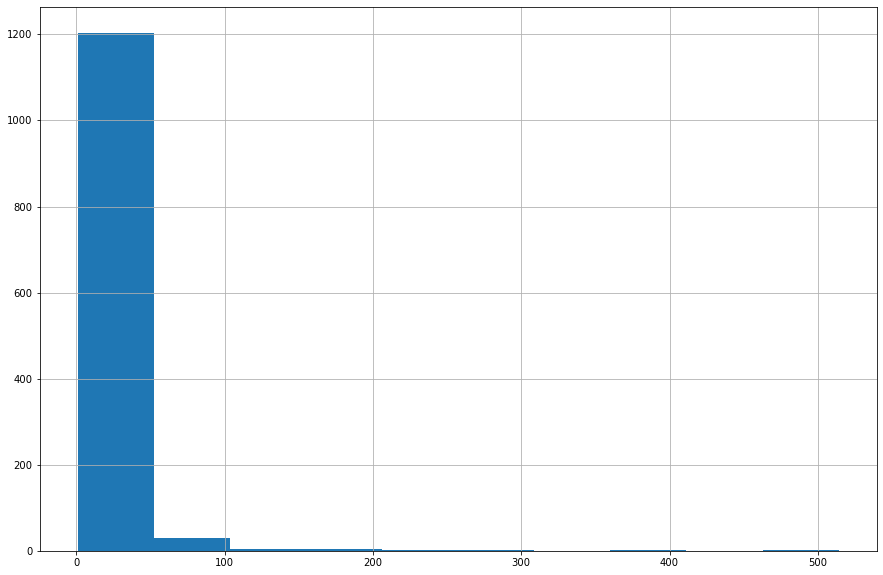

In [107]:
location_stats.hist()
plt.show()

# dimensionality reduction

In [108]:
location_stats1=location_stats[location_stats<=10]
print(len(location_stats1))
print(len(location_stats1.unique()))

1013
10


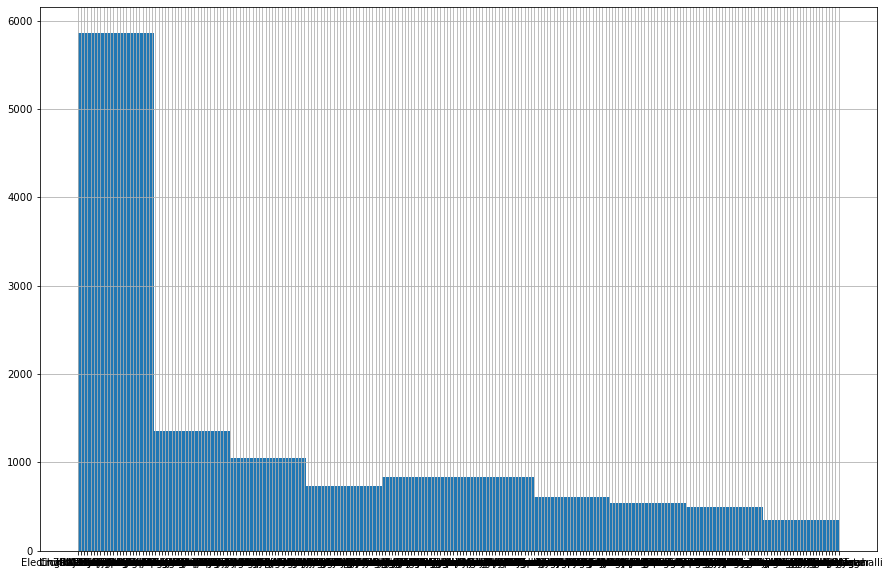

In [109]:

data3.location = data3.location.apply(lambda x: 'other' if x in location_stats1 else x)
len(data3.location.unique())
data3.location.hist()
plt.show()

In [110]:

print(len(data3['location'].unique()))
print(len(data3['location']))

236
12668


# outlier removal

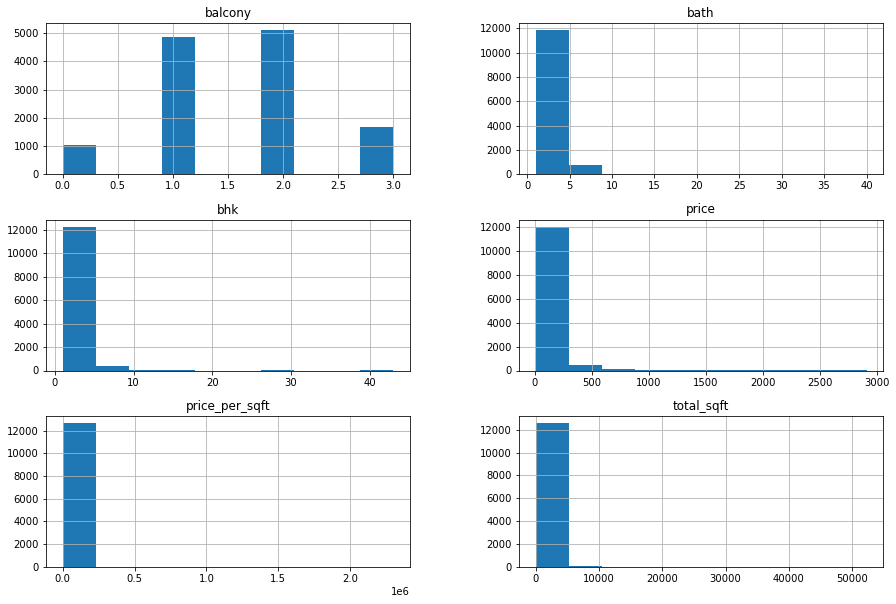

In [111]:
data4=data3.copy()
data4.hist()
plt.show()

In [112]:
data4[data4.total_sqft/data4.bhk<300].head()

data4.shape

(12668, 7)

In [113]:

data5 = data4[~(data4.total_sqft/data4.bhk<300)]
data5.shape

(12013, 7)

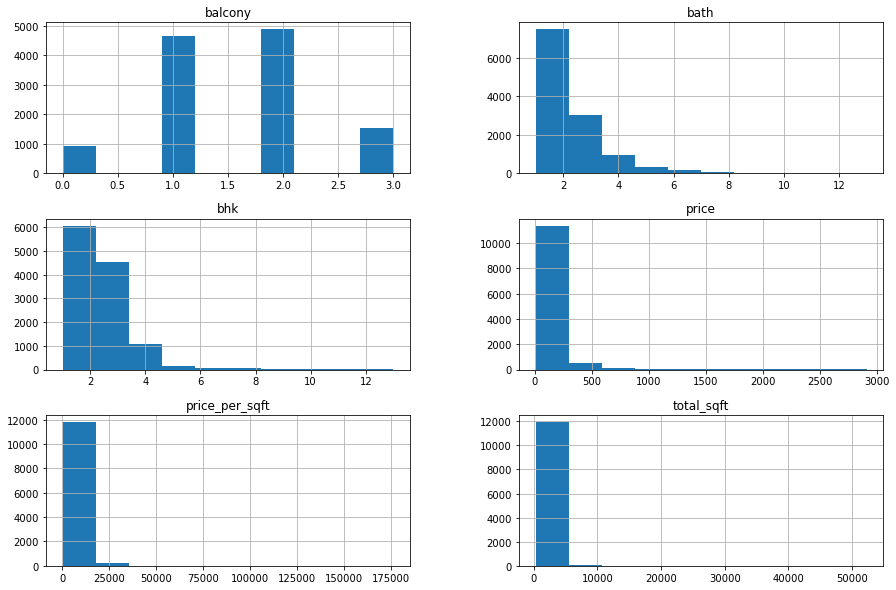

In [114]:
data5.hist()
plt.show()

In [115]:
print(data5.describe())
print(data5.shape)

         total_sqft          bath       balcony         price           bhk  \
count  12013.000000  12013.000000  12013.000000  12013.000000  12013.000000   
mean    1542.315982      2.511779      1.587613    105.003648      2.607259   
std     1181.094228      1.006207      0.808867    134.205666      0.922985   
min      300.000000      1.000000      0.000000      9.000000      1.000000   
25%     1107.000000      2.000000      1.000000     48.450000      2.000000   
50%     1285.000000      2.000000      2.000000     68.000000      2.000000   
75%     1660.000000      3.000000      2.000000    110.000000      3.000000   
max    52272.000000     13.000000      3.000000   2912.000000     13.000000   

       price_per_sqft  
count    12013.000000  
mean      6206.082347  
std       3985.518807  
min        267.829813  
25%       4199.363057  
50%       5252.525253  
75%       6823.529412  
max     176470.588235  
(12013, 7)


outlier removal techniques
https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

In [116]:

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data6 = remove_pps_outliers(data5)
data6.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000
mean,1462.686063,2.428644,1.591352,87.045488,2.533597,5587.667247
std,774.952706,0.912741,0.797213,78.877135,0.840424,2170.551920
min,300.000000,1.000000,0.000000,10.000000,1.000000,1250.000000
25%,1100.000000,2.000000,1.000000,48.000000,2.000000,4225.352113
50%,1269.860000,2.000000,2.000000,65.000000,2.000000,5142.857143
75%,1610.000000,3.000000,2.000000,96.177500,3.000000,6355.616616
max,30400.000000,13.000000,3.000000,2200.000000,13.000000,24000.000000


In [117]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    

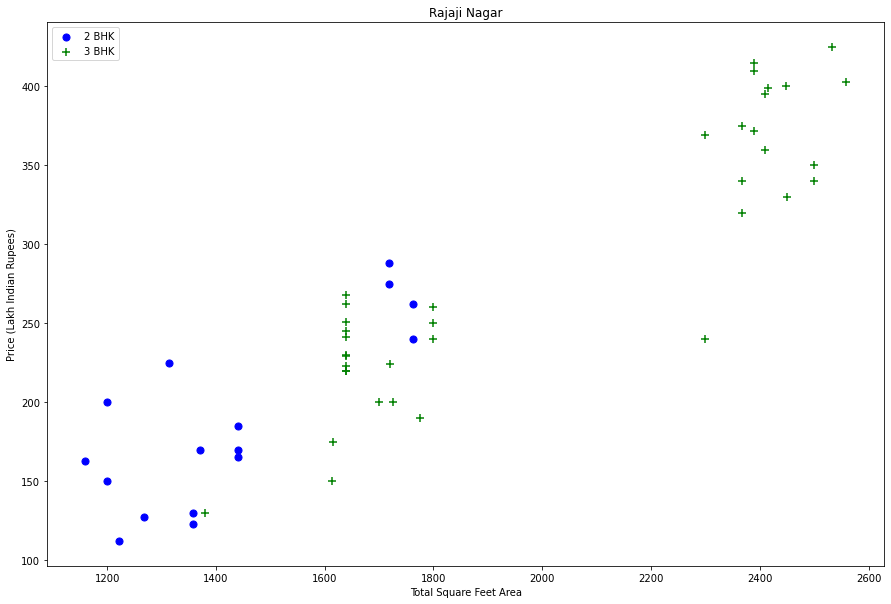

In [118]:
plot_scatter_chart(data6,"Rajaji Nagar")
print('\n')


remove datapoints where for given location priceof 2bhk> priceof 3bhk

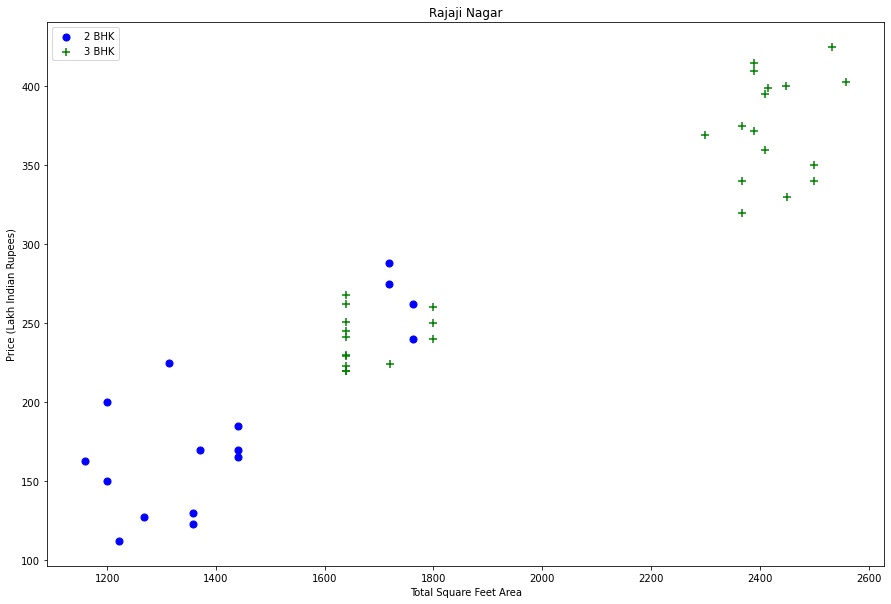

In [119]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data7 = remove_bhk_outliers(data6)
plot_scatter_chart(data7,"Rajaji Nagar")
print('\n')



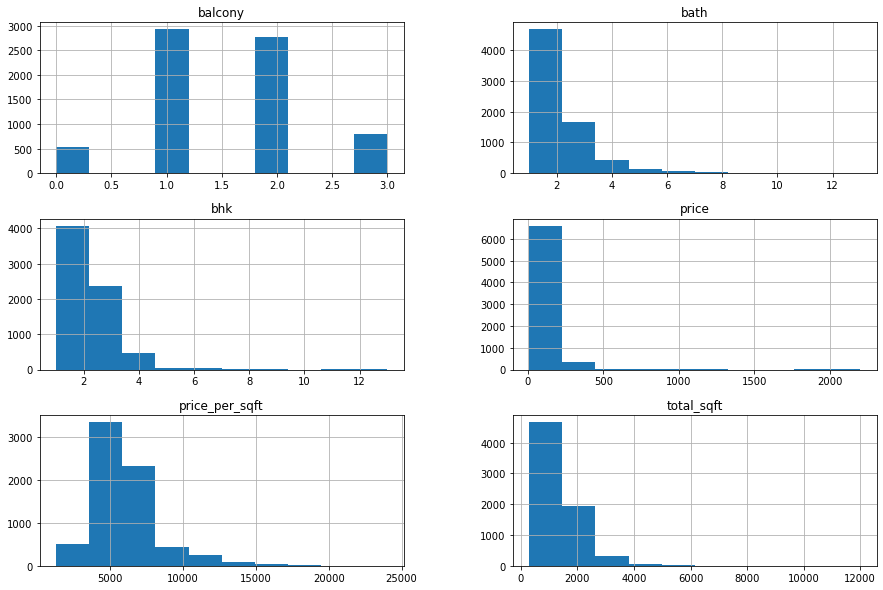

In [120]:
data7.hist()
plt.show()

In [121]:
data7=data7.drop('price_per_sqft',axis='columns')
data7.describe()

,total_sqft,bath,balcony,price,bhk
count,7014.000000,7014.000000,7014.000000,7014.000000,7014.000000
mean,1453.172958,2.407186,1.546478,94.531299,2.460080
std,735.789120,0.947885,0.790680,84.832532,0.866731
min,300.000000,1.000000,0.000000,10.000000,1.000000
25%,1088.000000,2.000000,1.000000,50.000000,2.000000
50%,1250.000000,2.000000,2.000000,71.500000,2.000000
75%,1645.000000,3.000000,2.000000,110.000000,3.000000
max,12000.000000,13.000000,3.000000,2200.000000,13.000000


In [122]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
""" location1=data7['location'].value_counts().to_dict()
print(data7['location'].value_counts())
print('\n')
data7['location']=data7['location'].map(location1)
print(data7.head(10)) """
dummy=pd.get_dummies(data7.location)
dummy=dummy.drop('other',axis='columns')
#print(dummy.head(10))
data8= pd.concat([data7,dummy],axis='columns')
#print(data7[data7['location']=='other'])
data8=data8.drop('location',axis='columns')
print(data8)
# creating one hot encoder object 


      total_sqft  bath  balcony  price  bhk  1st Block Jayanagar  \
0         2850.0   4.0      1.0  428.0    4                    1   
1         1630.0   3.0      2.0  194.0    3                    1   
2         1875.0   2.0      3.0  235.0    3                    1   
3         1200.0   2.0      0.0  130.0    3                    1   
4         1235.0   2.0      2.0  148.0    2                    1   
...          ...   ...      ...    ...  ...                  ...   
9842      1155.0   2.0      1.0   64.0    2                    0   
9844      1200.0   2.0      3.0   70.0    2                    0   
9845      1800.0   1.0      1.0  200.0    1                    0   
9848      1353.0   2.0      2.0  110.0    2                    0   
9849       812.0   1.0      0.0   26.0    1                    0   

      1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                      0                          0                     0   
1                      0     

datasplitting

In [123]:
Y=data8['price']
X=data8.drop(['price'],axis=1)
X

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842,1155.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9844,1200.0,2.0,3.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,1800.0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9848,1353.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
len(X.columns)

239

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.843901,{'normalize': False}
1,lasso,0.709667,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.727805,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [127]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [128]:
def predict_price(location,sqft,bath,balcony,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [129]:
predict_price('1st Phase JP Nagar',2850, 4,1,4)

259.08544690186454

In [132]:
import pickle
with open('realestatemodel.pickle','wb') as f:
    pickle.dump(model,f)

In [133]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))